In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# DATA CLEANING, FILTERING AND CUSTOMISING STARTS HERE

df1 = pd.read_csv("resale-flat-prices-from-1990-1999.csv")
df2 = pd.read_csv("resale-flat-prices-from-2000-feb-2012.csv")
df3 = pd.read_csv("resale-flat-prices-from-mar-2012-to-dec-2014.csv")
df4 = pd.read_csv("resale-flat-prices-from-jan-2015-to-dec-2016.csv")
df5 = pd.read_csv("resale-flat-prices-from-jan-2017-onwards.csv")
merged = pd.concat([df1,df2,df3,df4,df5])
merged.drop_duplicates(inplace = True)
merged[["record_year","record_month"]] = merged.month.str.split("-", expand = True)
merged["flat_age"] = (merged["record_year"].astype(int) - merged["lease_commence_date"].astype(int))

#this line of code removes property with negative ages, removal is necessary so to not include properties with negative ages
#in the graphs later
merged = merged[merged["flat_age"] >= 0]

In [3]:
#to check if the required columns are created
merged

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,record_year,record_month,flat_age
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,01,13
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,01,13
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,01,13
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,01,13
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,01,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144274,2023-01,YISHUN,5 ROOM,309,YISHUN RING RD,04 TO 06,134.0,Model A,1995,625000.0,71 years 02 months,2023,01,28
144275,2023-01,YISHUN,5 ROOM,676B,YISHUN RING RD,10 TO 12,113.0,Improved,2018,675000.0,94 years 10 months,2023,01,5
144276,2023-01,YISHUN,5 ROOM,299,YISHUN ST 20,13 TO 15,112.0,Improved,2000,590000.0,77 years,2023,01,23
144277,2023-01,YISHUN,5 ROOM,513D,YISHUN ST 51,07 TO 09,113.0,Improved,2018,691800.0,94 years 02 months,2023,01,5


In [4]:
#to check for NaN, from this we can see that only remaining_lease has NaN and since we are not using remaining_lease
#for anything we can just leave it alone
merged.isna().sum()

# DATA CLEANING, FILTERING AND CUSTOMISING ENDS HERE

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        707412
record_year                 0
record_month                0
flat_age                    0
dtype: int64

In [5]:
# QN1 STARTS HERE

#KB
#adds a column called price_per_sqm
merged["price_per_sqm"] = merged["resale_price"].astype(int)/merged["floor_area_sqm"].astype(int)
merged

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,record_year,record_month,flat_age,price_per_sqm
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,01,13,290.322581
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,01,13,193.548387
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,01,13,258.064516
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,01,13,193.548387
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,01,14,646.575342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144274,2023-01,YISHUN,5 ROOM,309,YISHUN RING RD,04 TO 06,134.0,Model A,1995,625000.0,71 years 02 months,2023,01,28,4664.179104
144275,2023-01,YISHUN,5 ROOM,676B,YISHUN RING RD,10 TO 12,113.0,Improved,2018,675000.0,94 years 10 months,2023,01,5,5973.451327
144276,2023-01,YISHUN,5 ROOM,299,YISHUN ST 20,13 TO 15,112.0,Improved,2000,590000.0,77 years,2023,01,23,5267.857143
144277,2023-01,YISHUN,5 ROOM,513D,YISHUN ST 51,07 TO 09,113.0,Improved,2018,691800.0,94 years 02 months,2023,01,5,6122.123894


Text(0.5, 1.0, 'Average percentage growth by town from 1990 to 2023')

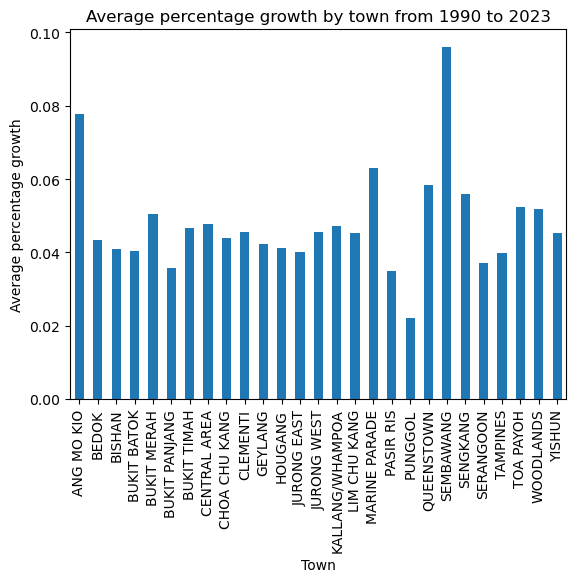

In [6]:
#KB
mean_price_per_sqm_by_town_year = merged.groupby(["town","record_year"]).price_per_sqm.mean()
mean_yoy_growth_by_town = mean_price_per_sqm_by_town_year.pct_change(periods = 1, fill_method = None).groupby("town").mean()
mean_yoy_growth_by_town.plot(kind = "bar")
plt.xlabel("Town")
plt.ylabel("Average percentage growth")
plt.title("Average percentage growth by town from 1990 to 2023")

#QN1 ENDS HERE

Text(0.5, 1.0, 'BUKIT TIMAH')

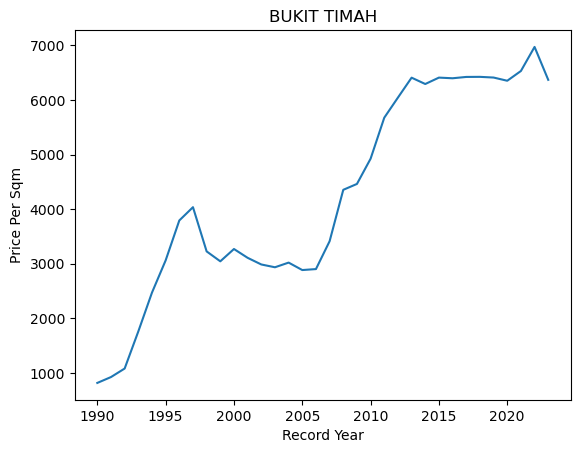

In [7]:
#QN2 STARTS HERE

#HUITING
merged[merged["town"]=="BUKIT TIMAH"].groupby("record_year").price_per_sqm.mean().plot(kind="line")
plt.xlabel("Record Year")
plt.ylabel("Price Per Sqm")
plt.title("BUKIT TIMAH")

Text(0.5, 1.0, 'SEMBAWANG')

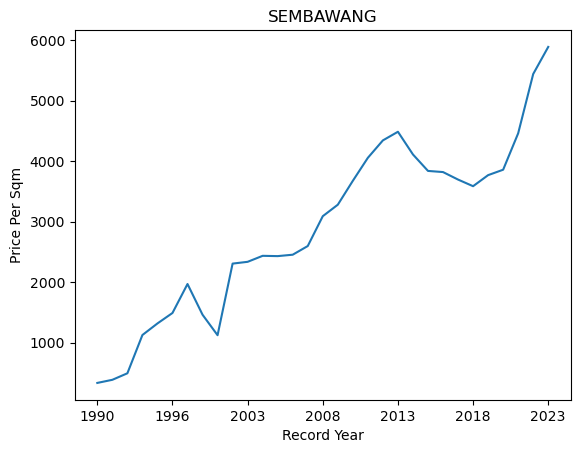

In [8]:
#HUITING
merged[merged["town"]=="SEMBAWANG"].groupby("record_year").price_per_sqm.mean().plot(kind="line")
plt.xlabel("Record Year")
plt.ylabel("Price Per Sqm")
plt.title("SEMBAWANG")

Text(0.5, 1.0, 'PASIR RIS')

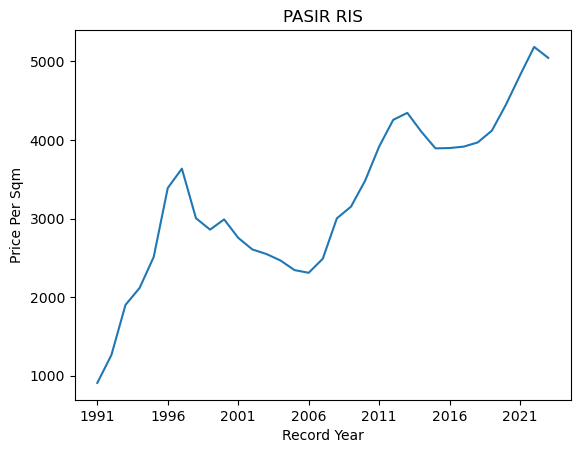

In [9]:
#HUITING
merged[merged["town"]=="PASIR RIS"].groupby("record_year").price_per_sqm.mean().plot(kind="line")
plt.xlabel("Record Year")
plt.ylabel("Price Per Sqm")
plt.title("PASIR RIS")

Text(0.5, 1.0, 'PUNGGOL')

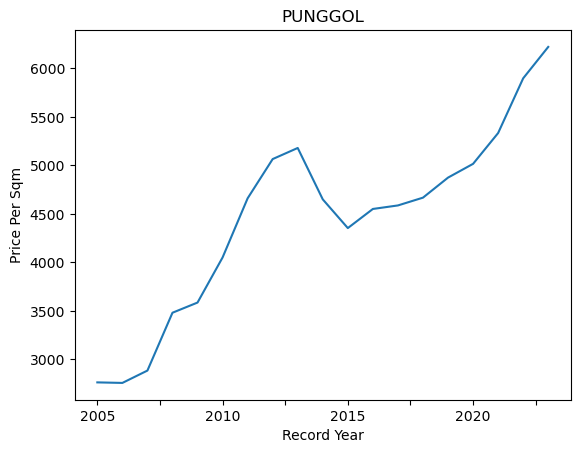

In [10]:
#HUITING
merged[merged["town"]=="PUNGGOL"].groupby("record_year").price_per_sqm.mean().plot(kind="line")
plt.xlabel("Record Year")
plt.ylabel("Price Per Sqm")
plt.title("PUNGGOL")

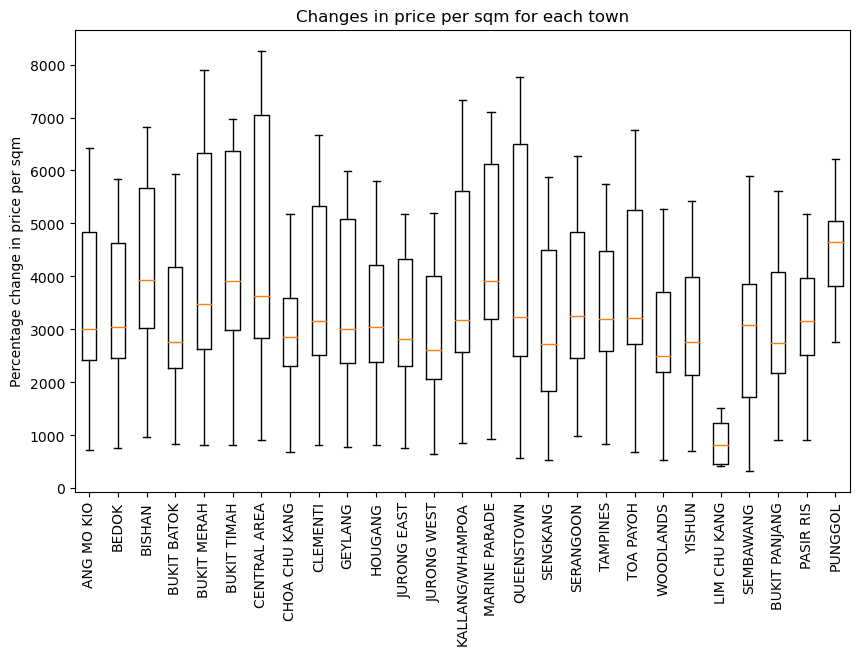

In [11]:
#HUITING
towns = merged['town'].unique()
mean_price_per_sqm = pd.DataFrame(merged.groupby(["town","record_year"]).price_per_sqm.mean())


# Create a boxplot to compare the percentage changes in price per square meter for each town
plt.figure(figsize=(10, 6))
plt.boxplot([mean_price_per_sqm.dropna().loc[town]["price_per_sqm"] for town in towns], labels=towns, showfliers=False)
plt.xticks(rotation=90)
plt.ylabel('Percentage change in price per sqm')
plt.title('Changes in price per sqm for each town')
plt.show()

# QN2 ENDS HERE

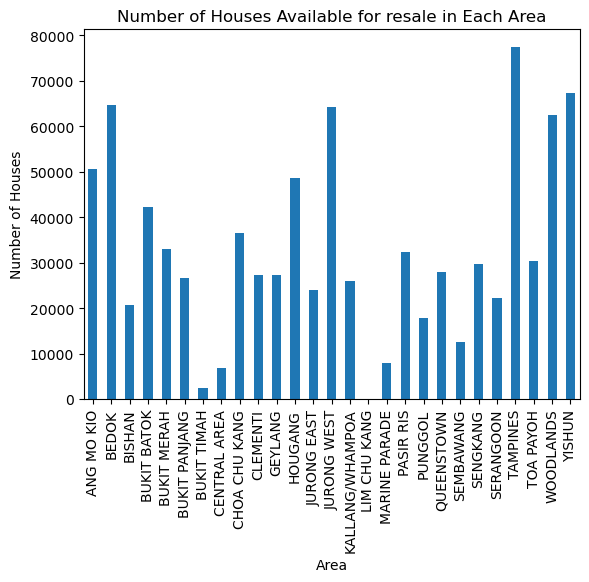

In [12]:
#QN3 STARTS HERE

#JOYLYN
houses_by_area = merged.groupby('town').town.count()
houses_by_area.plot(kind='bar')
plt.xlabel('Area') 
plt.ylabel('Number of Houses') 
plt.title('Number of Houses Available for resale in Each Area') 
plt.show()

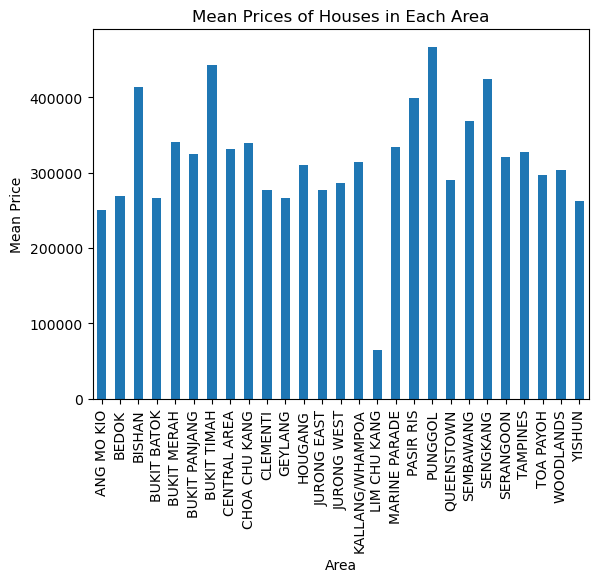

In [13]:
#JOYLYN
mean_prices_by_area = merged.groupby('town')['resale_price'].mean() 
mean_prices_by_area.plot(kind='bar')  
plt.xlabel('Area') 
plt.ylabel('Mean Price') 
plt.title('Mean Prices of Houses in Each Area') 
plt.show() 

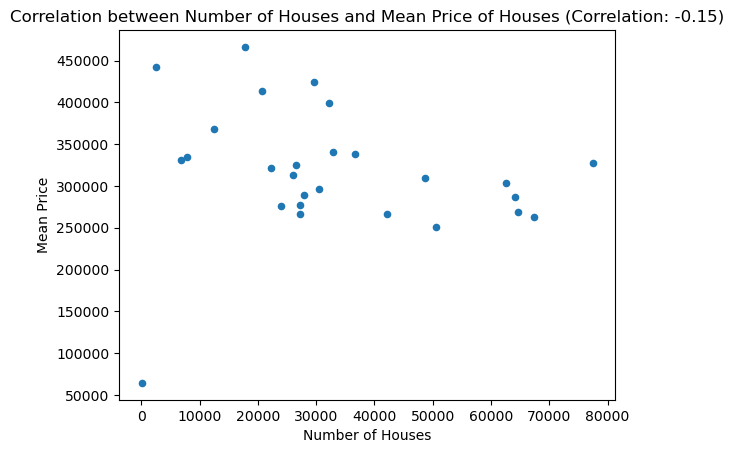

In [14]:
#JOYLYN
houses_by_area = merged.groupby('town')['town'].count() 
mean_prices_by_area = merged.groupby('town')['resale_price'].mean() 

houses_and_prices_by_area = pd.concat([houses_by_area, mean_prices_by_area], axis=1) 
correlation = houses_and_prices_by_area.corr().iloc[0,1] 
houses_and_prices_by_area.plot(kind='scatter', x='town', y='resale_price') 

plt.xlabel('Number of Houses') 
plt.ylabel('Mean Price') 
plt.title('Correlation between Number of Houses and Mean Price of Houses (Correlation: {:.2f})'.format(correlation))  
plt.show()

#QN3 ENDS HERE

Text(0.5, 1.0, 'Flat age to resale price')

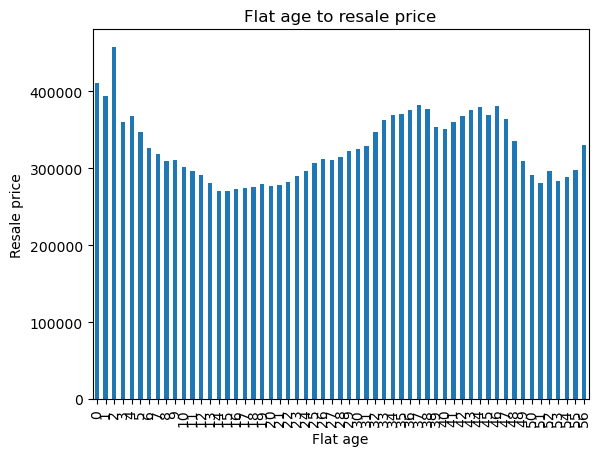

In [15]:
#QN4 STARTS HERE

#KB
#flats with ages 0 was included as well because it would mean that the house was sold the year that the lease started
#so it is still within the realm of possiblity and will not skew the graphs
flat_age_to_mean_price = merged.groupby("flat_age").resale_price.mean()

flat_age_to_mean_price.plot(kind="bar")
plt.xlabel("Flat age")
plt.ylabel("Resale price")
plt.title("Flat age to resale price")

In [16]:
#KB
#alternative way to find the remaining years by returning the remaning years where the mean price is max
#so we dont have to find through the list 
flat_age_to_mean_price.idxmax()

2

In [17]:
#KB
#it does not make sense to that 2 years old would be the best age to sell a house as it requires approval from the government
#thus this code filters out those ages 5 and below and we can see that the best age to sell a house unconditionally is 37
#which fits most of what the other graphs are saying as they typically have a range of around 30 to 40 as well.
min5_age_to_mean_price = merged[merged["flat_age"] >= 5]
min5_age_to_mean_price.groupby("flat_age").resale_price.mean()
min5_age_to_mean_price.groupby("flat_age").resale_price.mean().idxmax()

#QN4 ENDS HERE

37

In [18]:
#QN5 STARTS HERE

#FRANCIS
#to allocate a town index according to their town, from the west to the east in ascending score
town_dict = {"JURONG WEST" : 0,
"LIM CHU KANG" : 1,
"JURONG EAST" : 2,
"BUKIT BATOK" : 3,
"CHOA CHU KANG" : 4,
"CLEMENTI" : 5,
"BUKIT PANJANG" : 6,
"WOODLANDS" : 7,
"QUEENSTOWN" : 8,
"SEMBAWANG" : 9,
"BUKIT MERAH" : 10,
"BUKIT TIMAH" : 11,
"YISHUN" : 12,
"ANG MO KIO" : 13,
"BISHAN" : 14,
"TOA PAYOH" : 15,
"CENTRAL AREA" : 16,
"SERANGOON" : 17,
"HOUGANG" : 18,
"KALLANG/WHAMPOA" : 19,
"GEYLANG" : 20,
"SENGKANG" : 21,
"PUNGGOL" : 22,
"BEDOK" : 23,
"TAMPINES" : 24,
"MARINE PARADE" : 25,
"PASIR RIS" : 26}

#for loop to iterate each town and their index
for town,index in town_dict.items():
    merged.loc[merged["town"]== town, "town_index"] = town_dict[town]
    
#to check whether the scores were implemented correctly
merged

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,record_year,record_month,flat_age,price_per_sqm,town_index
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,01,13,290.322581,13.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,01,13,193.548387,13.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,01,13,258.064516,13.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,01,13,193.548387,13.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,01,14,646.575342,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144274,2023-01,YISHUN,5 ROOM,309,YISHUN RING RD,04 TO 06,134.0,Model A,1995,625000.0,71 years 02 months,2023,01,28,4664.179104,12.0
144275,2023-01,YISHUN,5 ROOM,676B,YISHUN RING RD,10 TO 12,113.0,Improved,2018,675000.0,94 years 10 months,2023,01,5,5973.451327,12.0
144276,2023-01,YISHUN,5 ROOM,299,YISHUN ST 20,13 TO 15,112.0,Improved,2000,590000.0,77 years,2023,01,23,5267.857143,12.0
144277,2023-01,YISHUN,5 ROOM,513D,YISHUN ST 51,07 TO 09,113.0,Improved,2018,691800.0,94 years 02 months,2023,01,5,6122.123894,12.0


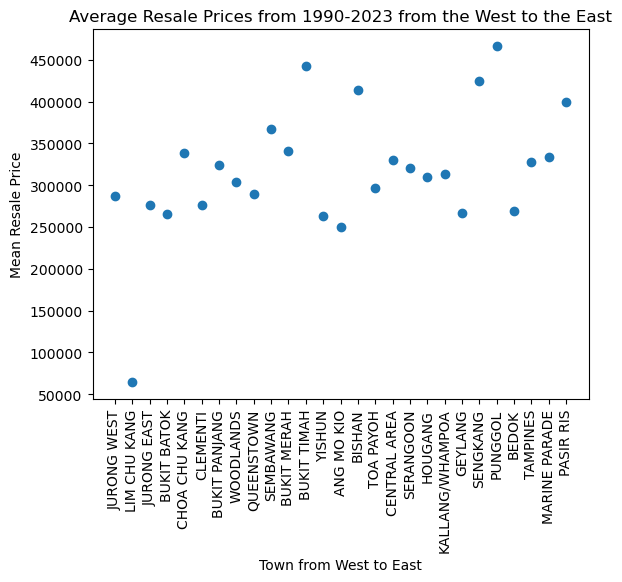

In [19]:
#FRANCIS
#to create a new separate dataframe called graph, containing the columns town, town index and mean resale price, arranged
#according to ascending town index
df_sorted = merged.sort_values('town_index')
graph = df_sorted.groupby(["town","town_index"]).resale_price.mean()
graph = graph.reset_index()

# Reset index and convert to dataframe
graph_df = graph.reset_index()

# Sort values by 'town_index'
graph_df_sorted = graph_df.sort_values(by='town_index')

# Create scatter plot with 'town' on x-axis and mean 'resale_price' on y-axis
plt.scatter(graph_df_sorted['town'], graph_df_sorted['resale_price'])
plt.xlabel('Town from West to East')
plt.ylabel('Mean Resale Price')
plt.xticks(rotation=90)  # rotate x-axis labels for better visibility
plt.title("Average Resale Prices from 1990-2023 from the West to the East")
plt.show()

#QN5 ends here

In [20]:
#QN6 STARTS HERE
#SHANNI
#list mature towns 
#mature towns are residential area of at least 20 years of age, with more amenities
mature_towns = [
    "ANG MO KIO",
    "BEDOK",
    "BISHAN",
    "BUKIT MERAH",
    "BUKIT TIMAH",
    "CENTRAL AREA",
    "CLEMENTI",
    "GEYLANG",
    "KALLANG/WHAMPOA",
    "MARINE PARADE",
    "PASIR RIS",
    "QUEENSTOWN",
    "SERANGOON",
    "TAMPINES",
    "TOA PAYOH",
]
#split up data according to mature and non-mature towns 
mature_rows = []
non_mature_rows = []

#iterate through each row of df
for index, row in merged.iterrows():
    is_mature = row["town"] in mature_towns
    if is_mature:
        mature_rows.append(row)
    else:
        non_mature_rows.append(row)

# convert to data frame to get the values
mature_df = pd.DataFrame(mature_rows)
non_mature_df = pd.DataFrame(non_mature_rows)

# get mean, median, maximum and minimum resale prices for mature and non-mature towns
print(mature_df["resale_price"].median())
print(mature_df["resale_price"].mean())
print(mature_df["resale_price"].max())
print(mature_df["resale_price"].min())
print(non_mature_df["resale_price"].median())
print(non_mature_df["resale_price"].mean())
print(non_mature_df["resale_price"].max())
print(non_mature_df["resale_price"].min())



280000.0
309295.7947440946
1418000.0
5000.0
298000.0
311189.0883234456
1198000.0
16800.0


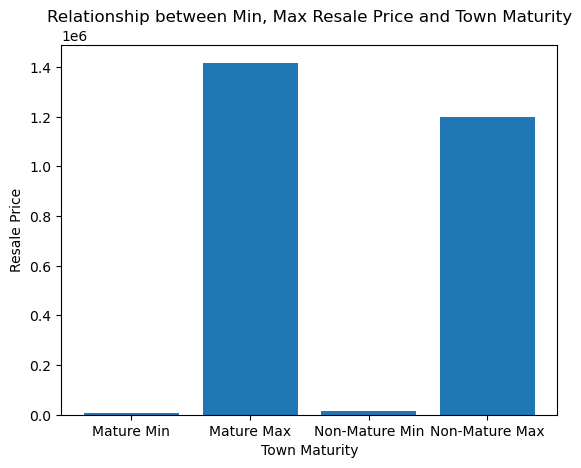

In [21]:
#SHANNI
# plot bar graph "Relationship between Minimum, Maximum Resale Price and Town Maturity"
plt.bar(["Mature Min","Mature Max","Non-Mature Min","Non-Mature Max"],[mature_df["resale_price"].min(),
mature_df["resale_price"].max(), non_mature_df["resale_price"].min(),non_mature_df["resale_price"].max()])
plt.title("Relationship between Min, Max Resale Price and Town Maturity")
plt.xlabel("Town Maturity")
plt.ylabel("Resale Price")
plt.show()

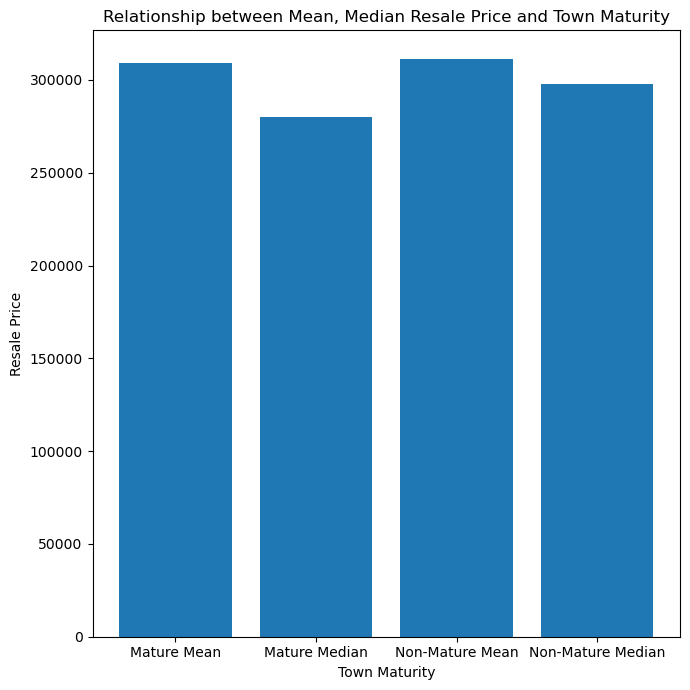

In [22]:
#SHANNI
# plot bar graph "Relationship between Mean, Median Resale Price and Town Maturity" 
plt.rcParams["figure.figsize"] = [7,7]
plt.rcParams["figure.autolayout"] = True
plt.bar(["Mature Mean","Mature Median","Non-Mature Mean","Non-Mature Median"], [mature_df["resale_price"].mean(),
mature_df["resale_price"].median(), non_mature_df["resale_price"].mean(),non_mature_df["resale_price"].median()])
plt.title("Relationship between Mean, Median Resale Price and Town Maturity")
plt.xlabel("Town Maturity")
plt.ylabel("Resale Price")
plt.show()

#QN6 ENDS HERE

C:\Users\user\AppData\Local\Temp\ipykernel_11516\2698260962.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = merged.drop("town_index", axis=1).corr()


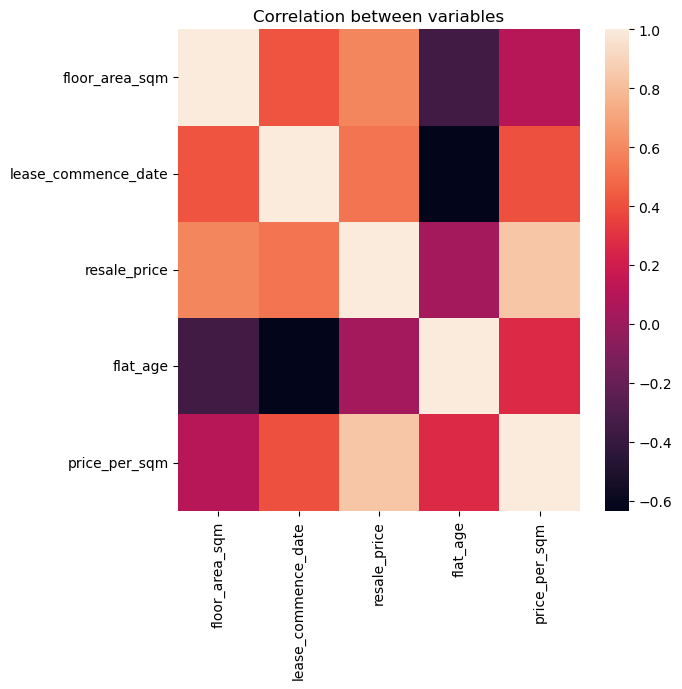

In [25]:
#QN7 STARTS HERE

#HUITING
#taking out town_index here as it doesnt make sense in the heatmap
data = merged.drop("town_index", axis=1).corr() 
sns.heatmap(data).set(title = "Correlation between variables")
plt.show()

#QN7 ENDS HERE